#### Getting Started
We will be using TensorFlow and  Keras for data augmentation and matplotlib for displaying the images.

In [1]:
from glob import glob
import pandas as pd
import cv2
from scripts.visualization import Visualization
import matplotlib.pyplot as plt
import numpy as np

#### Reading Data

In [2]:
# Path to all data
data_dir = './lgg-mri-segmentation/kaggle_3m'

# img size
IMG_SIZE = 512

In [3]:
images_paths = []
masks_paths = glob(f'{data_dir}/*/*_mask*')

for i in masks_paths:
    images_paths.append(i.replace('_mask', ''))

df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})
df.head()

,images_paths,masks_paths
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...


In [4]:
def pos_neg_diagnosis(masks_paths):
    value = np.max(cv2.imread(masks_paths))
    if value > 0 :
        return 1
    else:
        return 0

df['label'] = df['masks_paths'].apply(lambda x: pos_neg_diagnosis(x))
df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
1,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
2,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
3,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
4,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,0
...,...,...,...
3924,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3925,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3926,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0
3927,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_...,0


#### Data Distribution

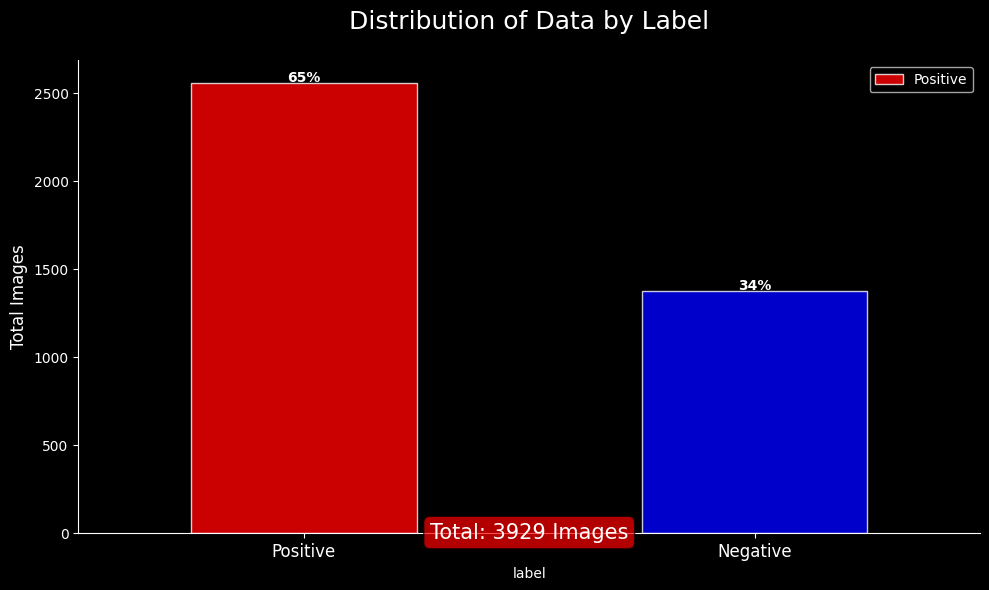

In [5]:
visualization = Visualization(df)
visualization.plot_distribution_grouped_by_label()

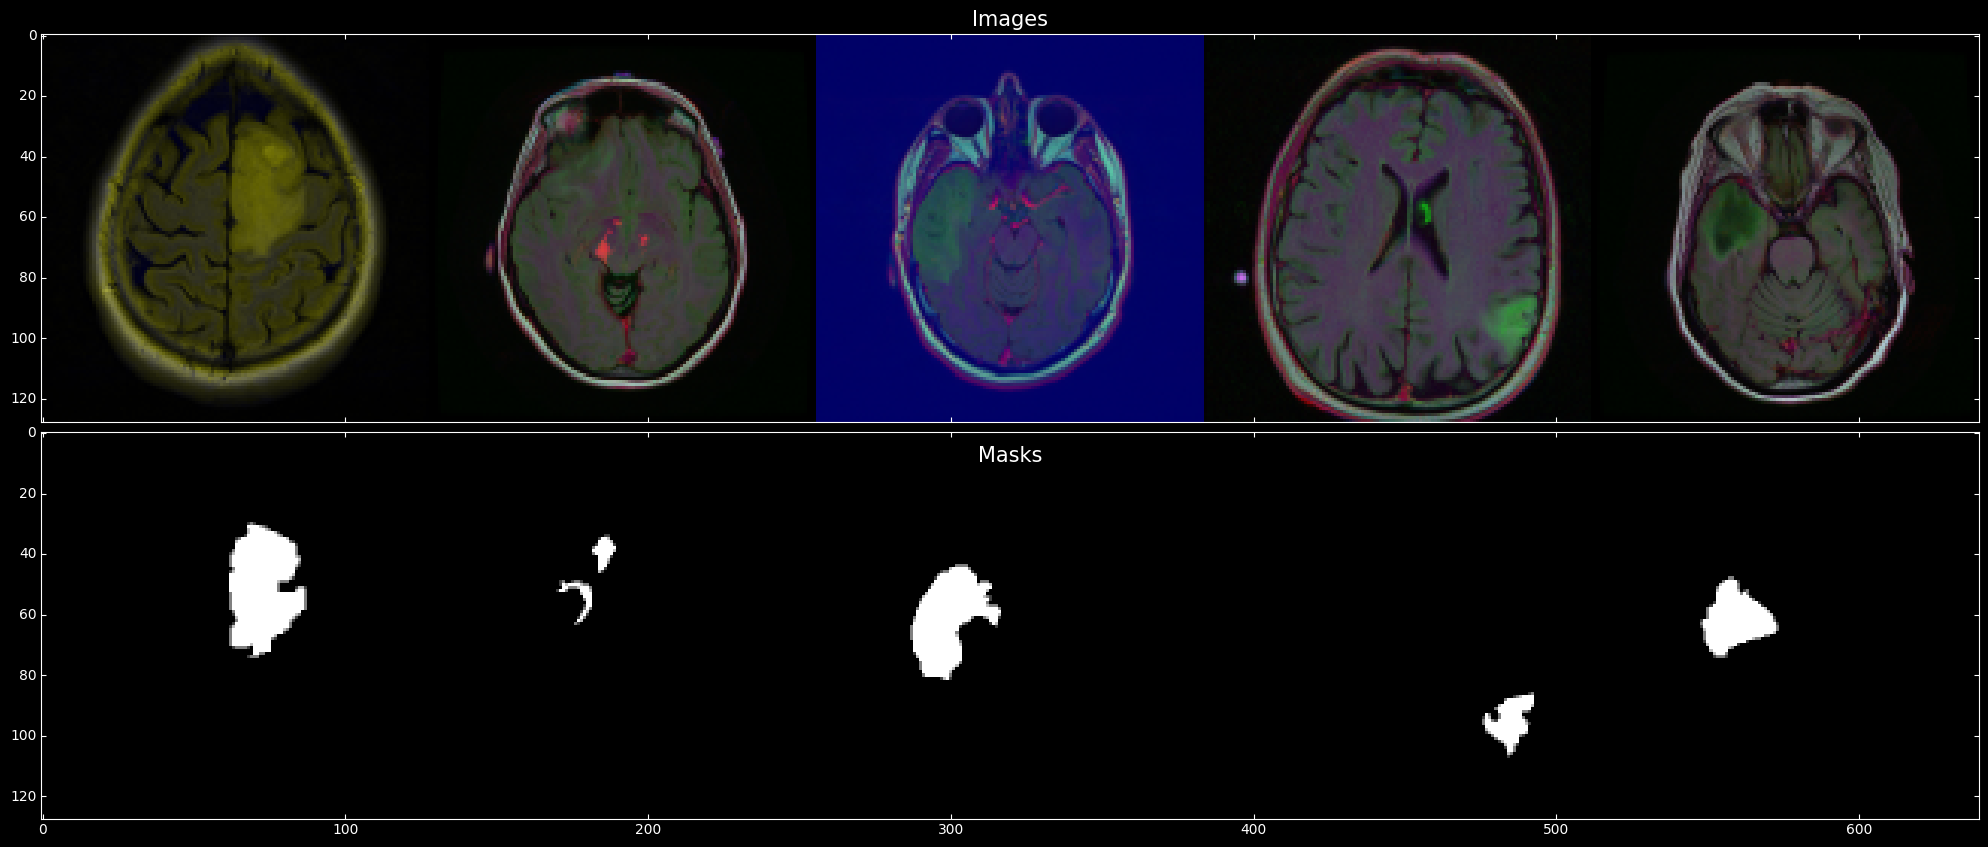

In [6]:
visualization = Visualization(df)
visualization.plot_images_and_masks()

#### Data Loading

In the code below, we have loaded 80% training, 10% validation, and a 10% test set with labels and metadata.

In [7]:
mask_df = df[df['label'] == 1]
mask_df.shape

(1373, 3)

In [8]:
from sklearn.model_selection import train_test_split
# Split df into train_df and val_df
train_df, val_df = train_test_split(mask_df, stratify=mask_df.label, test_size=0.1)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
val_df, test_df = train_test_split(val_df, stratify=val_df.label, test_size=0.3)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# train_df = train_df[:1000]
print(f"Train: {train_df.shape} \nVal: {val_df.shape} \nTest: {test_df.shape}")

Train: (1235, 3) 
Val: (96, 3) 
Test: (42, 3)


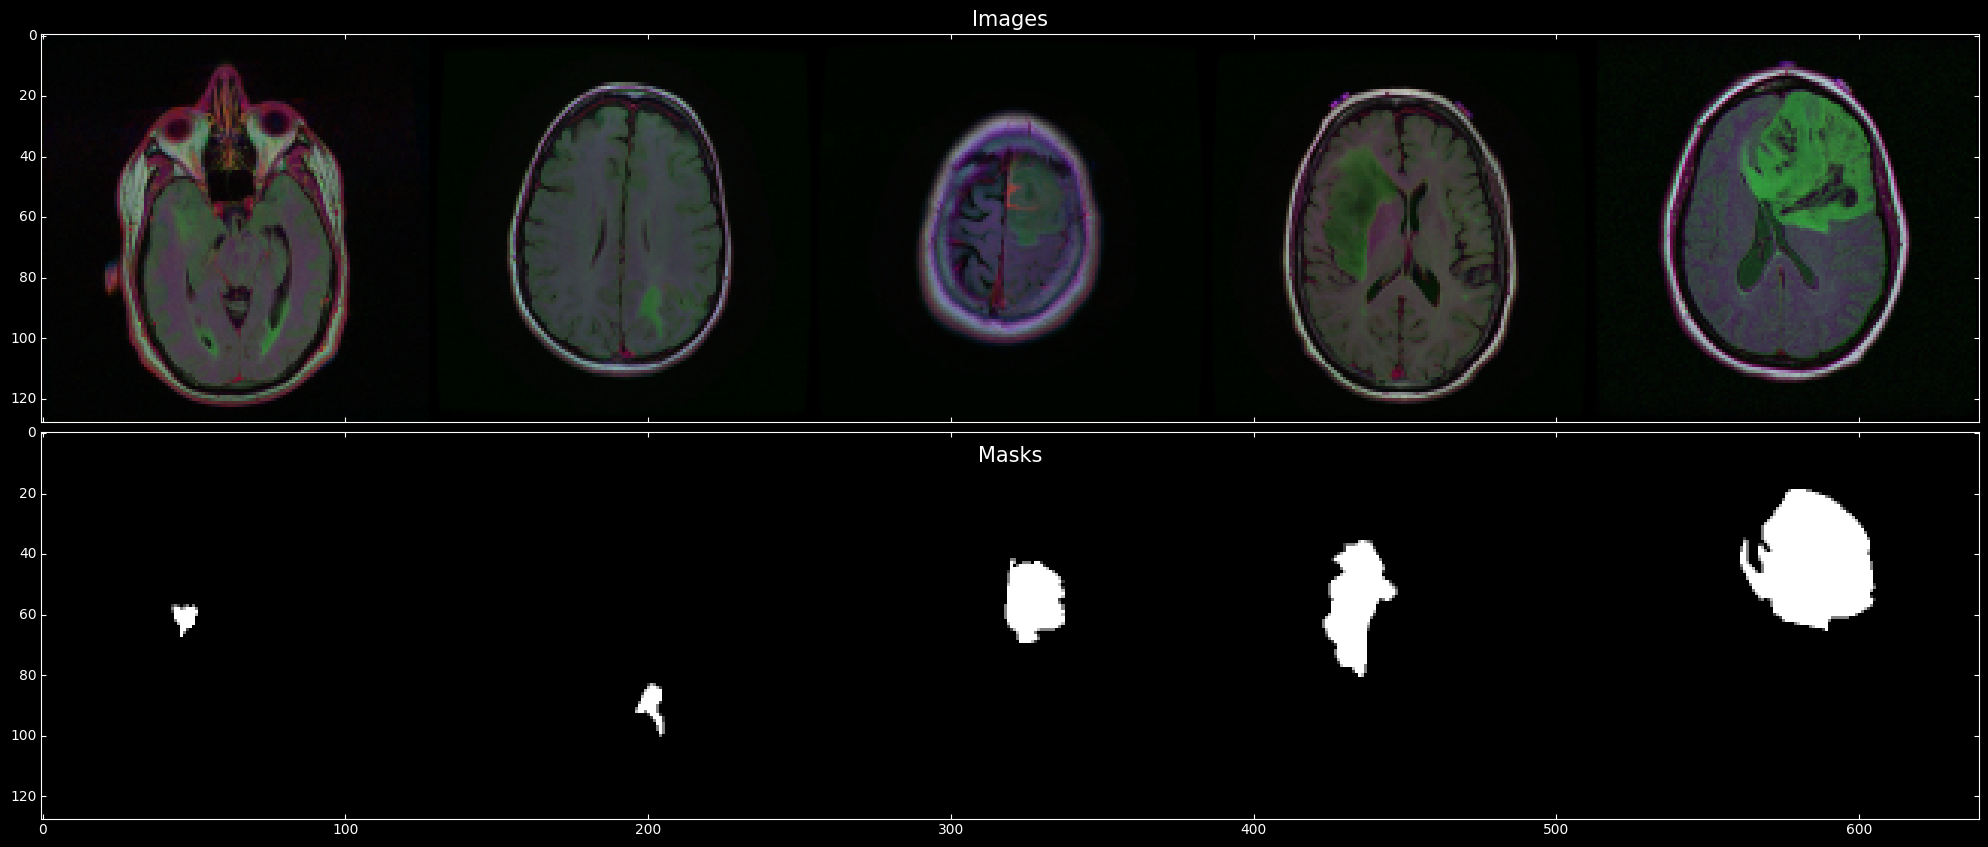

In [9]:
visualization = Visualization(train_df)
visualization.plot_images_and_masks()

#### GAN

In [10]:
train_df

,images_paths,masks_paths,label
0,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8105_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8105_...,1
1,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7879_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7879_...,1
2,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_6691_...,./lgg-mri-segmentation/kaggle_3m/TCGA_FG_6691_...,1
3,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7299_...,./lgg-mri-segmentation/kaggle_3m/TCGA_DU_7299_...,1
4,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_A5RC_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_A5RC_...,1
...,...,...,...
1230,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7684_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_7684_...,1
1231,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8105_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8105_...,1
1232,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,./lgg-mri-segmentation/kaggle_3m/TCGA_CS_6667_...,1
1233,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8106_...,./lgg-mri-segmentation/kaggle_3m/TCGA_HT_8106_...,1


In [11]:
from scripts.brain_mri_dataset import BrainMriDataset
from torch.utils.data import DataLoader
IMG_SIZE = 64
BATCH_SIZE = 26

# train
train_dataset = BrainMriDataset(df=train_df, img_size=IMG_SIZE)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
val_dataset = BrainMriDataset(df=val_df, img_size=IMG_SIZE)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
test_dataset = BrainMriDataset(df=test_df, img_size=IMG_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [12]:
images, masks, labels = next(iter(train_dataloader))

In [13]:
print(images.shape, masks.shape)

torch.Size([26, 64, 64, 3]) torch.Size([26, 64, 64, 3])


In [14]:
print(images[0].shape, masks[0].shape)

torch.Size([64, 64, 3]) torch.Size([64, 64, 3])


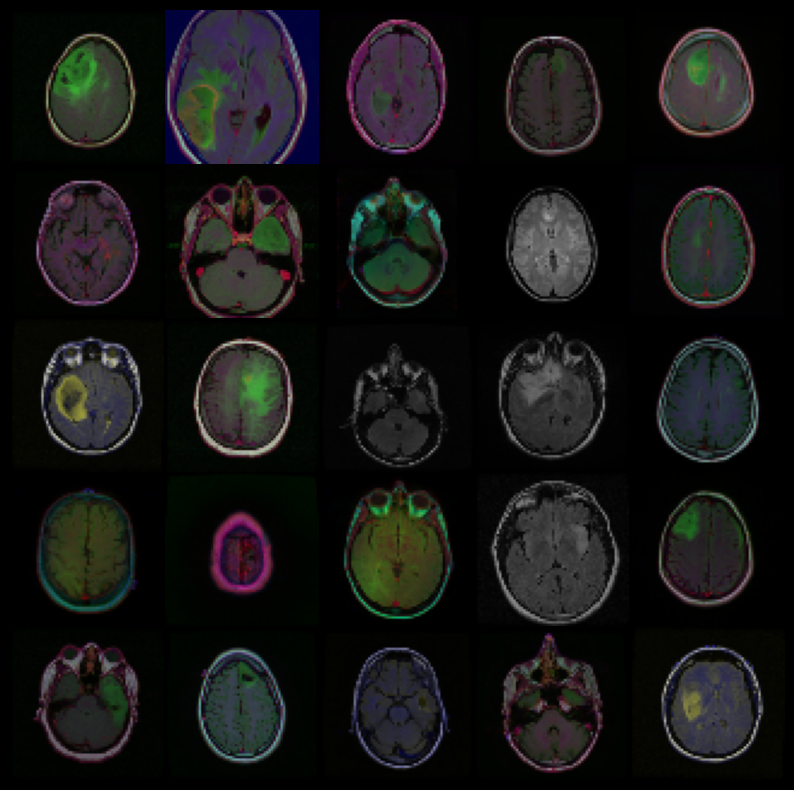

In [15]:
visualization = Visualization(train_df)
visualization.plot_images(images)

In [17]:
from scripts.gan import SimpleGAN

# Instantiate and train the GAN
gan = SimpleGAN(img_size=IMG_SIZE)

Metal device set to: Apple M1 Pro
Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Discriminator-Hidden-Layer-  (None, 32, 32, 64)       3136      
 1 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 32, 32, 64)       0         
 Activation-1 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidden-Layer-  (None, 16, 16, 128)      131200    
 2 (Conv2D)                                                      
                                                                 
 Discriminator-Hidden-Layer-  (None, 16, 16, 128)      0         
 Activation-2 (LeakyReLU)                                        
                                                                 
 Discriminator-Hidd

In [ ]:
gan.train(train_dataloader, epochs=100, batch_size=128)

1/4 [======>.......................] - ETA: 0s

2023-09-06 00:00:07.115410: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 1s 345ms/step
0/100 [D loss: 0.6857, acc.: 33.98%] [G loss: 0.6915]
Models and loss histories saved.
4/4 [==============================] - 1s 254ms/step
0/100 [D loss: 0.5227, acc.: 50.00%] [G loss: 0.6666]
Models and loss histories saved.
4/4 [==============================] - 1s 246ms/step
0/100 [D loss: 0.4615, acc.: 50.00%] [G loss: 0.6106]
Models and loss histories saved.
4/4 [==============================] - 1s 251ms/step
0/100 [D loss: 0.4878, acc.: 50.00%] [G loss: 0.5475]
Models and loss histories saved.
4/4 [==============================] - 1s 258ms/step
0/100 [D loss: 0.5486, acc.: 50.00%] [G loss: 0.5281]
Models and loss histories saved.
4/4 [==============================] - 1s 247ms/step
0/100 [D loss: 0.5778, acc.: 50.00%] [G loss: 0.5796]
Models and loss histories saved.
4/4 [==============================] - 1s 250ms/step
0/100 [D loss: 0.5786, acc.: 50.00%] [G loss: 0.6831]
Models and loss histories saved.
4/4 [===============

Models and loss histories saved.
4/4 [==============================] - 1s 247ms/step
0/100 [D loss: 0.4933, acc.: 50.00%] [G loss: 0.7089]
Models and loss histories saved.
4/4 [==============================] - 1s 245ms/step
0/100 [D loss: 0.5341, acc.: 50.00%] [G loss: 0.6699]
Models and loss histories saved.
4/4 [==============================] - 1s 244ms/step
0/100 [D loss: 0.4911, acc.: 50.00%] [G loss: 0.7614]
Models and loss histories saved.
4/4 [==============================] - 1s 247ms/step
0/100 [D loss: 0.6171, acc.: 44.14%] [G loss: 0.5937]
Models and loss histories saved.
4/4 [==============================] - 1s 251ms/step
0/100 [D loss: 0.5622, acc.: 50.00%] [G loss: 0.6403]
Models and loss histories saved.
4/4 [==============================] - 1s 252ms/step
0/100 [D loss: 0.6111, acc.: 49.22%] [G loss: 0.6174]
Models and loss histories saved.
4/4 [==============================] - 1s 257ms/step
0/100 [D loss: 0.6752, acc.: 50.00%] [G loss: 0.5527]
Models and loss hist

4/4 [==============================] - 1s 243ms/step


4/4 [==============================] - 1s 463ms/step


1/4 [======>.......................] - ETA: 0s

In [ ]:
# Generate synthetic images
num_images = 16
generated_images = gan.generate_images(num_images)

In [ ]:
def display_images(images):
    fig, axs = plt.subplots(4,4)
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow((images[count] * 0.5) + 0.5)
            axs[i, j].axis('off')
            count += 1
    plt.show()

In [ ]:
# Display a few samples from the dataset

In [ ]:
# Display the generated images
display_images(generated_images)

In [ ]:
print(generated_images.shape)

In [ ]:
test_images, test_masks, test_labels = next(iter(test_dataloader))

# Model evaluation

In [ ]:
gan.plot_real_vs_fake(test_images, 1000, 4)

In [ ]:
gan.plot_real_vs_fake(test_images, 1000, 6)

In [ ]:
gan.plot_losses()

# Brain Cancer Classifier

#### The fundamental idea underlying this classifier involves a two-step training process. Initially, the model is trained using authentic data, followed by a subsequent training round where both authentic and synthetic data are used. This approach aims to assess whether the classifier's performance exhibits improvement after incorporating synthetic data alongside genuine data.

In [ ]:
from scripts.brain_cancer_classifier import BrainCancerClassifier

In [ ]:
classifier = BrainCancerClassifier()

#### Based on real images

In [ ]:
all_data = df

In [ ]:
# Split df into train_df and val_df
all_train_df, all_val_df = train_test_split(all_data, stratify=all_data.label, test_size=0.1)
all_train_df = all_train_df.reset_index(drop=True)
all_val_df = all_val_df.reset_index(drop=True)

# Split train_df into train_df and test_df
all_val_df, all_test_df = train_test_split(all_val_df, stratify=all_val_df.label, test_size=0.3)
all_val_df = all_val_df.reset_index(drop=True)
all_test_df = all_test_df.reset_index(drop=True)

print(f"Train: {all_train_df.shape} \nVal: {all_val_df.shape} \nTest: {all_test_df.shape}")

In [ ]:
IMG_SIZE = 64
BATCH_SIZE = 26

# train
all_train_dataset = BrainMriDataset(df=all_train_df, img_size=IMG_SIZE)
all_train_dataloader = DataLoader(all_train_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

# val
all_val_dataset = BrainMriDataset(df=all_val_df, img_size=IMG_SIZE)
all_val_dataloader = DataLoader(all_val_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

#test
all_test_dataset = BrainMriDataset(df=all_test_df, img_size=IMG_SIZE)
all_test_dataloader = DataLoader(all_test_dataset, batch_size=BATCH_SIZE, num_workers=4, shuffle=True)

In [ ]:
all_train_images, all_train_masks, all_train_labels = next(iter(all_train_dataloader))

In [ ]:
all_val_images, all_val_masks, all_val_labels = next(iter(all_val_dataloader))

In [ ]:
classifier.train(all_train_images, all_train_labels, all_val_images, all_val_labels)

In [ ]:
all_test_images, all_test_masks, all_test_labels = next(iter(all_test_dataloader))

In [ ]:
classifier.plot_training_history()

In [ ]:
classifier.evaluate(all_test_images, all_test_labels)

In [ ]:
# Instantiate the CombinedBrainMriDataset
combined_dataset = CombinedBrainMriDataset(original_df=all_train_df, generated_images=generated_images, img_size=64)

# Create a DataLoader for the combined dataset
batch_size = 32  # Set your desired batch size
combined_dataloader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True)

#### Based on fake images

In [ ]:
balanced_train_images, balanced_train_masks, balanced_train_labels = next(iter(combined_dataloader))

In [ ]:
classifier_fake = BrainCancerClassifier()

In [ ]:
classifier_fake.train(balanced_train_images, balanced_train_labels, all_val_images, all_val_labels)

In [ ]:
classifier_fake.evaluate(all_test_images, all_test_labels)